In [35]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hindienglish-corpora/Hindi_English_Truncated_Corpus.csv


In [36]:
df = pd.read_csv('../input/hindienglish-corpora/Hindi_English_Truncated_Corpus.csv')

In [37]:
df.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [38]:
import pandas as pd 
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import tokenize,stem
from wordcloud import WordCloud, STOPWORDS

In [39]:
df.drop('hindi_sentence',axis=1,inplace=True)

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [42]:
df['source']= le.fit_transform(df['source'])

In [43]:
df.head()

,source,english_sentence
0,1,politicians do not have permission to do what ...
1,1,"I'd like to tell you about one such child,"
2,0,This percentage is even greater than the perce...
3,1,what we really mean is that they're bad at not...
4,0,.The ending portion of these Vedas is called U...


In [44]:
pd.set_option('display.max_rows',None)

In [45]:
df['english_sentence'].str.len().head()

0    63.0
1    42.0
2    61.0
3    64.0
4    55.0
Name: english_sentence, dtype: float64

In [46]:
df['lower_english_sentence'] = df['english_sentence'].str.lower()

In [47]:
df.dropna(axis=0,inplace=True)

In [48]:
def nlp_preprocesser(row):
    sentence = row.lower_english_sentence
    #convert all characters to lowercase
    lowered = sentence
    tok = tokenize.word_tokenize(lowered)
 
    #lemmatizing & stemming
    lemmatizer = stem.WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(i) for i in tok if i not in STOPWORDS]
    stemmer = stem.PorterStemmer()
    stems = [stemmer.stem(i) for i in lem if i not in STOPWORDS]
 
    #remove non-alphabetical characters like '(', '.' or '!'
    alphas = [i for i in stems if i.isalpha() and (i not in STOPWORDS)]
    return " ".join(alphas)

In [49]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [50]:
nltk.download('wordnet')

[nltk_data] Error loading wordnet: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


False

In [51]:
df['new_english_sentence'] = df.apply(nlp_preprocesser, axis=1)

In [78]:
df.isna().apply(pd.value_counts).T

,False
source,127605
english_sentence,127605
lower_english_sentence,127605
new_english_sentence,127605


In [53]:
df.head()

,source,english_sentence,lower_english_sentence,new_english_sentence
0,1,politicians do not have permission to do what ...,politicians do not have permission to do what ...,politician permiss need done
1,1,"I'd like to tell you about one such child,","i'd like to tell you about one such child,",tell one child
2,0,This percentage is even greater than the perce...,this percentage is even greater than the perce...,percentag even greater percentag india
3,1,what we really mean is that they're bad at not...,what we really mean is that they're bad at not...,realli mean bad pay attent
4,0,.The ending portion of these Vedas is called U...,.the ending portion of these vedas is called u...,end portion veda call upanishad


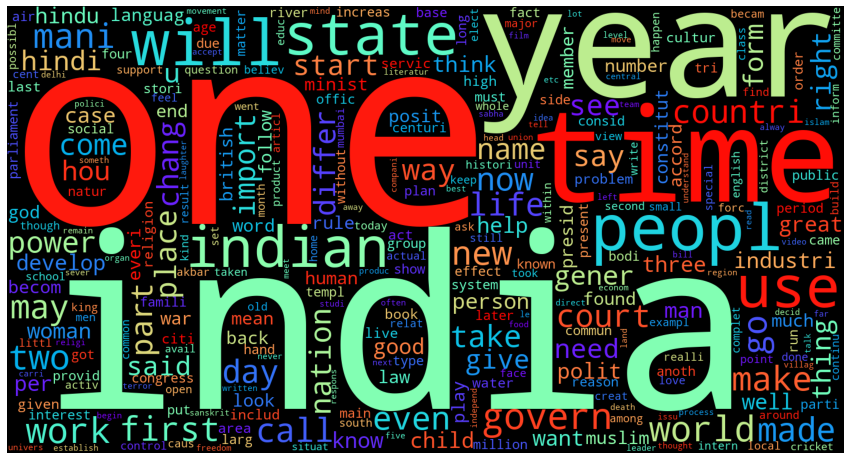

In [54]:
 wordcloud = WordCloud(width = 1500, height = 800, random_state=0, background_color='black', colormap='rainbow', \
                      min_font_size=5, max_words=300, collocations=False, stopwords = STOPWORDS).generate(" ".join(df['new_english_sentence'].values))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [55]:
 feature_df = pd.DataFrame()
for i in [1,2,3]:
    vec_tfidf = TfidfVectorizer(max_features=10, norm='l2', stop_words='english', lowercase=True, use_idf=True, ngram_range=(i,i))
    X = vec_tfidf.fit_transform(df['new_english_sentence']).toarray()
    tfs = pd.DataFrame(X, columns=["TFIDF_" + n for n in vec_tfidf.get_feature_names()])
    feature_df = pd.concat([feature_df, tfs], axis=1)
feature_df = pd.concat([df, feature_df], axis=1)

In [56]:
feature_df.head()

,source,english_sentence,lower_english_sentence,new_english_sentence,TFIDF_govern,TFIDF_india,TFIDF_indian,TFIDF_peopl,TFIDF_state,TFIDF_time,...,TFIDF_atal bihari vajpaye,TFIDF_court high court,TFIDF_east india compani,TFIDF_green hous ga,TFIDF_indian nation congress,TFIDF_indian penal code,TFIDF_play import role,TFIDF_second world war,TFIDF_subha chandra bose,TFIDF_unit state america
0,1.0,politicians do not have permission to do what ...,politicians do not have permission to do what ...,politician permiss need done,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,"I'd like to tell you about one such child,","i'd like to tell you about one such child,",tell one child,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,This percentage is even greater than the perce...,this percentage is even greater than the perce...,percentag even greater percentag india,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,what we really mean is that they're bad at not...,what we really mean is that they're bad at not...,realli mean bad pay attent,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,.The ending portion of these Vedas is called U...,.the ending portion of these vedas is called u...,end portion veda call upanishad,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
X=feature_df.drop(['english_sentence','lower_english_sentence','new_english_sentence','source'],axis=1)

In [100]:
y=feature_df[['source']]

In [101]:
df.shape

(127605, 4)

In [63]:
feature_df.shape

(127607, 34)

In [82]:
feature_df.isna().apply(pd.value_counts).T

,False
source,127603
english_sentence,127603
lower_english_sentence,127603
new_english_sentence,127603
TFIDF_govern,127603
TFIDF_india,127603
TFIDF_indian,127603
TFIDF_peopl,127603
TFIDF_state,127603
TFIDF_time,127603


In [81]:
feature_df.dropna(axis=0, inplace=True)

In [85]:
from sklearn.model_selection import train_test_split

In [102]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [104]:
lr= LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [105]:
import warnings
warnings.filterwarnings('ignore')

In [106]:
lr.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial')

In [107]:
lr_pred = lr.predict(X_test)

In [108]:
lr_pred

array([2., 2., 2., ..., 2., 2., 2.])

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
accuracy_score(lr_pred,y_test)

0.3908988793396202

In [111]:
lr.score(X_train,y_train)

0.3935088779919841

In [112]:
from sklearn.ensemble import RandomForestClassifier

In [113]:
rf = RandomForestClassifier()

In [114]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [115]:
rf_pred = rf.predict(X_test)

In [116]:
accuracy_score(rf_pred,y_test)

0.390794388861315

In [117]:
rf.score(X_train,y_train)

0.3982109670629856

Model accuracy is too low. We'll use LSTM to overcome this

In [118]:
import pandas as pd
import numpy as np
import nltk
from keras.models import Model, Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, Bidirectional
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [120]:
df = pd.read_csv('../input/hindienglish-corpora/Hindi_English_Truncated_Corpus.csv')

In [121]:
df.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [127]:
df['source'] = le.fit_transform(df['source'])

In [134]:
X = df[['english_sentence','hindi_sentence']]
y = df['source']

In [142]:
X.head()

,english_sentence,hindi_sentence
0,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [135]:
y = y.values.reshape(-1,1)

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [137]:
#Tokenization
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [139]:
model1 = Sequential()
model1.add(Embedding(max_words,128))
model1.add(LSTM(128,dropout=0.2,input_shape=[max_len]))
model1.add(Dense(1,activation='sigmoid'))

In [140]:
model1.summary()
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         128000    
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 259,713
Trainable params: 259,713
Non-trainable params: 0
_________________________________________________________________


In [144]:
model1.fit(sequences_matrix,y_train,batch_size=128,epochs=10,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',min_delta=0.0001)])

Epoch 1/10
1/1 [==============================] - 0s 179ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: -5.4470 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 117ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: -5.8399 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 116ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: -6.1860 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 116ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: -6.5001 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 122ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: -6.7877 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 119ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: -7.0501 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 116ms/step - loss: 8.6033e-04 - accuracy: 1.0000 - val_loss: -7.2887 - val_ac